IMPORT PACKAGE AND MODULE

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

IMPORT DATA AND ANALYSE DATA

In [11]:
data = pd.read_csv("Handwriting_train.csv")

#Transfer data into numpy array
data = np.array(data)

#Initalize m as number of rows and n as number of columns
m, n = data.shape

#shuffle data order
np.random.shuffle(data)

SEPERATE DATA FOR TRAINING, TESTING AND INITIALIZE VARIABLE FOR PLOTTING

In [12]:
#data for testing will be 10% of the data
data_test = data[0:int(m * 0.1)].T

#data for trainning will be 90% of the data
data_train = data[int(m * 0.1) :m].T

#Y_train will be the set of the label for each image in the data for checking the prediction of the neural network
Y_train = data_train[0]

#X_train will be the set of the pixels of each image in the data
X_train = data_train[1:n]

#transfer all pixels into number that in range [0, 1]
X_train = X_train / 255
m_train, n_train = X_train.shape

#Initialize data for ploting training process
iterations_list = []
accuracies = []


DEFINE REQUIREMENT FUNCTION FOR NERUALS NETWORK

In [13]:
#Initialize W and B dicionary for the neural networks
def init_parameters(layers_lists):
    list_len = len(layers_lists)
    w_b_dictionary = {}
    for i in range(1, list_len):
        w = np.random.rand(layers_lists[i], layers_lists[i - 1]) - 0.5
        b = np.random.rand(layers_lists[i], 1) - 0.5
        w_b_dictionary["w" + str(i)] = w
        w_b_dictionary["b" + str(i)] = b
    return w_b_dictionary

#Function for ReLU function:
#f(x) = x | x > 0
#       0 | x <= 0
def ReLU(Z):
    return np.maximum(Z, 0)

#Function for softmax function:
#f(x) = e ^ xi / sum(e ^ x) 
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#Derivative of ReLU function
def ReLU_derivatite(Z):
    return Z > 0

#Function for one-hot encode
def OneHot(Y):
    result_Y = np.zeros((Y.size, Y.max() + 1))
    result_Y[np.arange(Y.size), Y] = 1
    result_Y = result_Y.T
    return result_Y

#Function for forward propagation
def forward_propagation(w_b_dictionary, X):
    number_of_z = int(len(w_b_dictionary)/2)
    z = 0
    a = X
    a_z_dictionary = {}
    for i in range(1, number_of_z):
        z = w_b_dictionary["w" + str(i)].dot(a) + w_b_dictionary["b" + str(i)]
        a = ReLU(z)
        a_z_dictionary["z" + str(i)] = z
        a_z_dictionary["a" + str(i)] = a
    z = w_b_dictionary["w" + str(number_of_z)].dot(a) + w_b_dictionary["b" + str(number_of_z)]
    a = softmax(z)
    a_z_dictionary["z" + str(number_of_z)] = z
    a_z_dictionary["a" + str(number_of_z)] = a
    return a_z_dictionary

#Function for backward progagation
def backward_propagation(a_z_dicitonary, w_b_dictionary, x, y):
    onehot_Y = OneHot(y)

    length = int(len(w_b_dictionary)/2)

    dw_db_dictionary = {}

    dz = a_z_dicitonary["a" + str(length)] - onehot_Y
    dw = 1 / m * dz.dot(a_z_dicitonary["a" + str(length - 1)].T)
    db = 1/m * np.sum(dz)

    dw_db_dictionary["dw" + str(length)] = dw
    dw_db_dictionary["db" + str(length)] = db

    for i in range(length - 1, 1, -1):
        dz = w_b_dictionary["w" + str(i + 1)].T.dot(dz) * ReLU_derivatite(a_z_dicitonary["z" + str(i)]) 
        dw = 1 / m * dz.dot(a_z_dicitonary["a" + str(i - 1)].T)
        db = 1/m * np.sum(dz)
        dw_db_dictionary["dw" + str(i)] = dw
        dw_db_dictionary["db" + str(i)] = db

    dz = w_b_dictionary["w2"].T.dot(dz) * ReLU_derivatite(a_z_dicitonary["z1"]) 
    dw = 1 / m * dz.dot(x.T)
    db = 1/m * np.sum(dz)
    dw_db_dictionary["dw1"] = dw
    dw_db_dictionary["db1"] = db
    return dw_db_dictionary

#Function for update new w, b dictionary value
def update_parameters(w_b_dictionary, dw_db_dictionary, alpha):
    length = int(len(w_b_dictionary)/2)

    for i in range(1, length + 1):
        w_b_dictionary["w" + str(i)] = w_b_dictionary["w" + str(i)] - alpha * dw_db_dictionary["dw" + str(i)]
        w_b_dictionary["b" + str(i)] = w_b_dictionary["b" + str(i)] - alpha * dw_db_dictionary["db" + str(i)]
    return w_b_dictionary

DEFINE FUNCTION FOR GET PREDICTION AND GET THE ACCURACIES FOR MACHINE

In [14]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

DEFINE FUNCTION FOR GRADIENT DESCENT

In [15]:
def gradient_decent(x, y, alpha, iterations, layer_depth):

    length_layers = len(layer_depth)

    w_b_dicitonary = init_parameters(layer_depth)
    for i in range(iterations):
        a_z_dictionary = forward_propagation(w_b_dicitonary, x)
        dw_db_dictionary = backward_propagation(a_z_dictionary, w_b_dicitonary, x, y)
        w_b_dicitonary = update_parameters(w_b_dicitonary, dw_db_dictionary, alpha)
        print("iteration: ", i)
        predicitions = get_predictions(a_z_dictionary["a" + str(length_layers - 1)])
        print(predicitions, y)
        print(get_accuracy(predicitions, y))
        iterations_list.append(i)
        accuracies.append(get_accuracy(predicitions, y))
    return w_b_dicitonary

GET W AND B DICTIONARY AND STARTING TRAINING

In [16]:
w_b_dictionary = gradient_decent(X_train, Y_train, 0.1, 500, [784, 16, 8 ,2])

iteration:  0
[0 0 0 ... 0 0 0] [1 1 1 ... 1 1 1]
0.12007581647480202
iteration:  1
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.6986107462078358
iteration:  2
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8154426470351683
iteration:  3
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8558468228393109
iteration:  4
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8721066149069988
iteration:  5
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8799268644472207
iteration:  6
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8841922113853397
iteration:  7
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8867471300729747
iteration:  8
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8885674761263894
iteration:  9
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8898918516056042
iteration:  10
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8909776250247985
iteration:  11
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8917926253196999
iteration:  12
[1 1 1 ... 1 1 0] [1 1 1 ... 1 1 1]
0.8923958327748079
iteration:  13
[1 1 1 ... 1 1 1] [1 1 1 ... 1 1 1]
0.8929427408674391
iteration:  14
[1 1 1 ... 1 1

SAVING DATA INTO CSV FILES

In [17]:
np.savetxt("data_training.csv", data_train, delimiter= ",")

np.savetxt("data_testing.csv", data_test, delimiter= ",")

w_b_length = int(len(w_b_dictionary)/2)

for i in range(1, w_b_length + 1):
    np.savetxt("w"+ str(i) + ".csv", w_b_dictionary["w" + str(i)],   delimiter= ",")
    np.savetxt("b"+ str(i) + ".csv", w_b_dictionary["b" + str(i)],   delimiter= ",")

PLOTTING DATA 

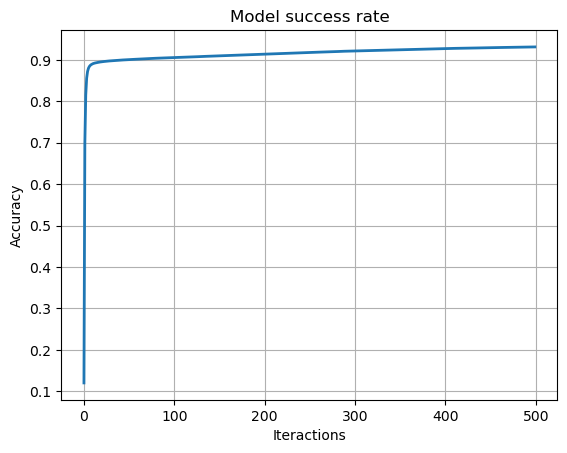

In [18]:
plt.plot(iterations_list, accuracies, linewidth=2.0)
plt.xlabel("Iteractions")
plt.ylabel("Accuracy")
plt.title("Model success rate")
plt.grid(True)
plt.show()